<a href="https://colab.research.google.com/github/paulrobustelli/python_demos/blob/main/Fit_POB_models_students_4.11.22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import matplotlib as mpl # matplotlib library for plotting and visualization
import matplotlib.pylab as plt # matplotlib library for plotting and visualization
import numpy as np #numpy library for numerical manipulation, especially suited for data arrays
import warnings
import scipy, scipy.optimize
from mpl_toolkits.mplot3d import  Axes3D
from matplotlib import cm # to colormap 3D surfaces from blue to red

warnings.filterwarnings('ignore')


**Liner Regression Example:**

https://data36.com/linear-regression-in-python-numpy-polyfit/

Here is some data we will use to illustrate how to perfrom a regression:

x_data=np.array([29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50])

y_data=np.array([65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100])


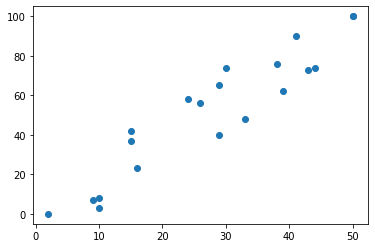

9 7


In [157]:
#Liner Regression Example: https://data36.com/linear-regression-in-python-numpy-polyfit/
#Here is some date we will use to illustrate how to perfrom a regression:

x_data=np.array([29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50])
y_data=np.array([65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100])

#Here is how to make a simple plot
plt.scatter(x_data,y_data)
plt.show()
print(x_data[1],y_data[1])

**Now we are going to use a python function to fit our data**

The function np.line_fit takes x-data, y-data, and the degree of the polynomial you want to fit, and returns parameters

1st degree polynomial: y=(a*x+b)

line_fit=np.polyfit(x_data,y_data,1)

2nd degree polynomial:  y=(a*x^2+b*x+c)

line_fit=np.polyfit(x_data,y_data,2)

3rd degree polynomial: (a*x^3+b*x^2+c*x+d):

line_fit=np.polyfit(x_data,y_data,3)




In [158]:
#Here we fit a line and print out the parameters

#the function polyfit returns the coefficients for the polynomial you have just fit
#These coefficients are stored in array.  

line_fit=np.polyfit(x_data,y_data,1)

#Here we print out all the items in the array

print(line_fit)

#This is the equation we have fit
print("y=a*x+b")
#Here we print each coeffiicent one at a time.  The a coefficient is stored 
#in the 0th position in our array of parameters, (line_fit[0])
print("a:",line_fit[0])
#The a coefficient is stored 
#The b coefficient is stored in the 1st position in our array of parameters, (line_fit[0])
print("b:",line_fit[1])


[ 2.01467487 -3.9057602 ]
y=a*x+b
a: 2.014674871440727
b: -3.9057601953360934


**Plotting a Function We have Fit**

We want to plot the line: y = 2.01467487 * x - 3.905760

To do this, we need to create an array of x-value, that we will feed into out function to generate y-values

We do this the funciton np.linspace, which will create an array of 51 values that span from 0 to 50 in an interval of 1:

https://numpy.org/doc/stable/reference/generated/numpy.linspace.html

In [162]:

x_range = np.linspace(0, 50, 51)
#lets look at our array.  We print the length of it, and then the values
print(len(x_range))
print(x_range)
#Now lets use our coefficients from out linear fit to map the array of x-values on onto our line
y_fit = line_fit[0]*x_range+line_fit[1]
print(len(y))
print(y)

51
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.]
51
[-3.9057602  -1.89108532  0.12358955  2.13826442  4.15293929  6.16761416
  8.18228903 10.1969639  12.21163878 14.22631365 16.24098852 18.25566339
 20.27033826 22.28501313 24.299688   26.31436288 28.32903775 30.34371262
 32.35838749 34.37306236 36.38773723 38.4024121  40.41708698 42.43176185
 44.44643672 46.46111159 48.47578646 50.49046133 52.50513621 54.51981108
 56.53448595 58.54916082 60.56383569 62.57851056 64.59318543 66.60786031
 68.62253518 70.63721005 72.65188492 74.66655979 76.68123466 78.69590953
 80.71058441 82.72525928 84.73993415 86.75460902 88.76928389 90.78395876
 92.79863363 94.81330851 96.82798338]


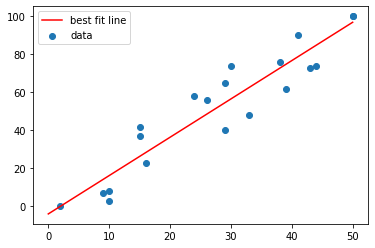

In [163]:
#Now we plot our data and our linear fit
plt.scatter(x_data,y_data,label='data')
plt.plot(x_range,y_fit,c='r',label='best fit line')
plt.legend()
plt.show()

**Now lets calculate the correlation coefficien R^2**

https://en.wikipedia.org/wiki/Coefficient_of_determination

We will first calculate the deviation of each data point from the average y-value Then we will square that deviation, and take the sum of all of the squared deviation

In [133]:
#Calculate the mean
y_mean=np.mean(y_data)
print("Data Mean:",y_mean)
#Subtract the mean value from every data point in y 
#Array Operation
y_deviation=y_data-y_mean
print(y_deviation)
#Now we square these deviations:
y_deviation_squared=y_deviation**2
#x**0.5 is taking the square root of x 
print(y_deviation_squared)

#Now we take the sum of the deviations squared: 
#"Total Sum of Squares":  SStot=Summation((y_i-y_ave)^2) for each element i in our dataset
SStot=np.sum(y_deviation_squared)
print("Sum of Squares of y-data:",SStot)

#We generate the y_values predicted by our model:
y_predict = line_fit[0]*x_data+line_fit[1]
#Now we calculate the sum of the squares of the residuals from out linear fit
#"Residual Sum of Squares": SS_residuals=Summation((y_pred_i-y_i)^2) for each element i in our dataset
SS_residuals=np.sum((y_predict-y_data)**2)
print("Sum of Squares of the Residuals:",SS_residuals)
#R^2 = 1 - SS_residuels/SS_total
R2= 1-SS_residuals/SStot
print("Correlation Coefficient:",R2)

Data Mean: 51.8
[ 13.2 -44.8 -43.8  24.2 -28.8   4.2  48.2 -48.8  22.2  -3.8  21.2 -51.8
  10.2 -14.8  22.2 -11.8  38.2  -9.8   6.2  48.2]
[ 174.24 2007.04 1918.44  585.64  829.44   17.64 2323.24 2381.44  492.84
   14.44  449.44 2683.24  104.04  219.04  492.84  139.24 1459.24   96.04
   38.44 2323.24]
Sum of Squares of y-data: 18749.2
Sum of Squares of the Residuals: 2292.1268451492765
Correlation Coefficient: 0.8777480188408424


**Class Exercise** 

1) Fit a 2nd Order 

2) Print out the coefficients 

3) Plot data vs. fit polynomials on the range x=[-50,50] (x going form -50 to 50)

4) Calculate the Correlation Coefficient of the Fit


In [134]:
#COMPLETE CLASS EXERCISE HERE



**Homework Problem #1** 

1) Fit a 3rd Order Polynomial 

2) Print out the coefficients

3) Plot data vs. fit polynomials on the range x=[-50,50] (x going form -50 to 50)

4) Calculate the Correlation Coefficient of the Fit



Now lets use a library to calculate the correlation efficient and
make a function that is a first order polynomial to predict data based our linear fit
line_fit = [a,b]

In [135]:
#COMPLETE Homework Problem #1 Here 



**Class Activity** 

Lets Use polyfit to fit the data using a 2nd order polynomial

          2
-0.01059 x + 2.588 x - 9.52


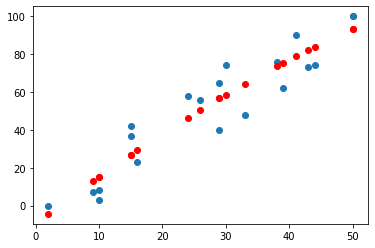

Correlation Coefficient: 0.8817956886030568


In [136]:
#Complete Class Activity Here 

#Now lets use a library to calculate the correlation efficient 
#make a function that is a first order polynomial to predict data based our linear fit
#line_fit = [a,b]
poly2_fit=np.polyfit(x_data,y_data,2)

#Make our function
predict = np.poly1d(poly2_fit)
print(predict)

#generate the y values predicted by our linear-fit and plot them
y_predict=predict(x_data)
plt.scatter(x_data,y_data)
plt.scatter(x_data,y_predict,c='r')
plt.show()

#Calculate the Correlation Coefficient with a built-in python function
correlation_coef=r2_score(y_data, predict(x_data))
print("Correlation Coefficient:",correlation_coef)

**Homework Problem 2** 

Use polyfit to fit the data using a 3rd order polynomial and calcuate the correlation coefficient

In [137]:
#COMPLETE Homework Problem #2 Here 


1st order poloynomial  
2.015 x - 3.906
Correlation Coefficient: 0.8777480188408424
2nd order poloynomial
          2
-0.01059 x + 2.588 x - 9.52
Correlation Coefficient: 0.8817956886030568
10th order poloynomial
            10             9             8            7            6
-9.814e-11 x  + 2.675e-08 x - 3.146e-06 x + 0.000209 x - 0.008633 x
           5         4         3         2
 + 0.2295 x - 3.932 x + 42.21 x - 264.8 x + 838.6 x - 899.5
Correlation Coefficient: 0.931426971617421
20th order poloynomial
            20             19             18            17
-2.427e-23 x  + 5.422e-21 x  - 3.911e-19 x  + 2.52e-18 x 
              16            15             14             13
 + 7.901e-16 x  - 6.03e-15 x  - 1.868e-12 x  + 3.527e-12 x 
              12             11             10             9
 + 4.592e-09 x  - 7.136e-09 x  - 1.153e-05 x  + 0.0001987 x
            8         7         6         5            4             3
 + 0.02387 x - 1.607 x + 50.06 x - 951.1 x + 1.17e+

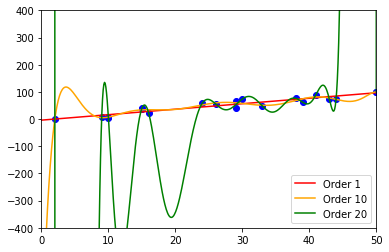

In [138]:
#Now lets fit some really high_order polynomials to our data for fun

line_fit=np.polyfit(x_data,y_data,1)
line_predict = np.poly1d(line_fit)
print("1st order poloynomial",line_predict)
correlation_coef=r2_score(y_data, line_predict(x_data))
print("Correlation Coefficient:",correlation_coef)

poly_fit2=np.polyfit(x_data,y_data,2)
predict2 = np.poly1d(poly_fit2)
print("2nd order poloynomial")
print(predict2)
correlation_coef=r2_score(y_data, predict2(x_data))
print("Correlation Coefficient:",correlation_coef)

poly_fit10=np.polyfit(x_data,y_data,10)
predict10 = np.poly1d(poly_fit10)
print("10th order poloynomial")
print(predict10)
correlation_coef=r2_score(y_data, predict10(x_data))
print("Correlation Coefficient:",correlation_coef)


poly_fit20=np.polyfit(x_data,y_data,20)
predict20 = np.poly1d(poly_fit20)
print("20th order poloynomial")
print(predict20)
correlation_coef=r2_score(y_data, predict20(x_data))
print("Correlation Coefficient:",correlation_coef)


x = np.linspace(0, 50, 500)

predict_y_1=line_predict(x)
predict_y_10=predict10(x)
predict_y_20=predict20(x)
plt.scatter(x_data,y_data,color='blue')

plt.plot(x,predict_y_1,c='r',label='Order 1')
plt.plot(x,predict_y_10,c='orange',label='Order 10')
plt.plot(x,predict_y_20,c='g',label='Order 20')
plt.ylim(-400,400)
plt.xlim(0,50)
plt.legend()
plt.show()

**Homework Problem 3** 

Use polyfit to fit a 3rd, 4th, and 5th order polynomial to our data, and plot the functions from on the range x=(-50,50)

In [139]:
####Solve Homework Problem 3 Here#####
x_data=np.array([29, 9, 10, 38, 16, 26, 50, 10, 30, 33, 43, 2, 39, 15, 44, 29, 41, 15, 24, 50])
y_data=np.array([65, 7, 8, 76, 23, 56, 100, 3, 74, 48, 73, 0, 62, 37, 74, 40, 90, 42, 58, 100])



Now we're going to introduce a function to calculate the Root Mean Squared Deviation (RMSD) of any given fit to a function to predict some data

https://en.wikipedia.org/wiki/Root-mean-square_deviation

In [140]:
def calculate_RMSD(y_data,y_predicted):
  y_deviation=y_data-y_predicted
  N=len(y_data)
  y_deviation_squared=y_deviation**2
  RMSD=(np.sum(y_deviation_squared)/N)**0.5
  return RMSD 

In [141]:
predict_y_1=line_predict(x_data)
predict_y_10=predict10(x_data)
predict_y_20=predict20(x_data)

RMSD_1=calculate_RMSD(y_data,predict_y_1)
print("RMSD Linear Prediciton:",RMSD_1)
RMSD_10=calculate_RMSD(y_data,predict_y_10)
print("RMSD 10th order:",RMSD_10)
RMSD_20=calculate_RMSD(y_data,predict_y_20)
print("RMSD 20th order:",RMSD_20)

RMSD Linear Prediciton: 10.705435173661266
RMSD 10th order: 8.017759736206393
RMSD 20th order: 4.107919183571218


Polynomial Order: 0 RMSD: 30.617968580557395
Polynomial Order: 1 RMSD: 10.705435173661266
Polynomial Order: 2 RMSD: 10.526719040716268
Polynomial Order: 3 RMSD: 10.304609011605834
Polynomial Order: 4 RMSD: 9.531426702062191
Polynomial Order: 5 RMSD: 9.043833856461154
Polynomial Order: 6 RMSD: 8.883249989221909
Polynomial Order: 7 RMSD: 8.63997201825212
Polynomial Order: 8 RMSD: 8.341021188124687
Polynomial Order: 9 RMSD: 8.151099428265528
Polynomial Order: 10 RMSD: 8.017759736206393
Polynomial Order: 11 RMSD: 7.814315338282768
Polynomial Order: 12 RMSD: 7.075713230113643
Polynomial Order: 13 RMSD: 6.922663483516764
Polynomial Order: 14 RMSD: 6.795281787810786
Polynomial Order: 15 RMSD: 4.1079888510014335
Polynomial Order: 16 RMSD: 4.107925038773361
Polynomial Order: 17 RMSD: 4.107921199219487
Polynomial Order: 18 RMSD: 4.107919381857566
Polynomial Order: 19 RMSD: 4.107919186728256
Polynomial Order: 20 RMSD: 4.107919183571218


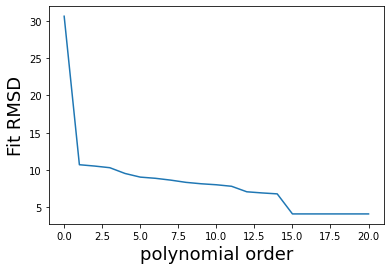

In [142]:
#Not lets make a loop to check the fit of a bunch of polynomials

#Make some empty lists to starte our RMSD values in for plotting
polynomial_order=[]
polynomial_rmsd=[]

for i in range(0,21):
  poly_fit=np.polyfit(x_data,y_data,i)
  predict = np.poly1d(poly_fit)
  y_predict=predict(x_data)
  RMSD=calculate_RMSD(y_data,y_predict)
  polynomial_order.append(i)
  polynomial_rmsd.append(RMSD)
  print("Polynomial Order:",i,"RMSD:",RMSD)

plt.plot(polynomial_order,polynomial_rmsd)
plt.xlabel('polynomial order',size=18)
plt.ylabel('Fit RMSD',size=18)

plt.show()

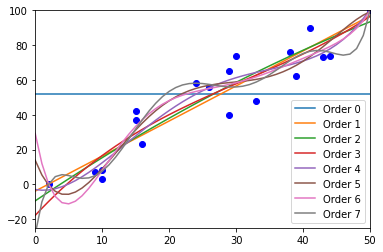

In [143]:
#We can also use a loop to plot these functions

x = np.linspace(0, 50, 51)
plt.scatter(x_data,y_data,color='blue')

for i in range(0,8):
  poly_fit=np.polyfit(x_data,y_data,i)
  predict = np.poly1d(poly_fit)
  y_predict=predict(x)
  label='order %s'%i
  plt.plot(x,y_predict,label='Order %s'%i)    
  #RMSD=calculate_RMSD(y_data,y_predict)
  #print("Polynomial Order:",i,"RMSD:",RMSD)
plt.ylim(-25,100)
plt.xlim(0,50)    
plt.legend()
plt.show()

Remember the Particle Box?  

Now lets use some of the tools we've developed to determine the Particle in a Box Wavefunction parameters n+L for some data of particle position distributions

We recall that our 1D Box Wavefunction is

#ψ(x) = $ (\frac{2}{L})^\frac{1}{2} sin(\frac{nπx}{L}) $#


In [144]:
#Define Psi=((2/L)^(1/2))*sin(n*pi/L)
#x**0.5=np.sqrt(x)
def psi(x,n,L): 
  return np.sqrt(2.0/L)*np.sin(float(n)*np.pi*x/L)

In [145]:
#Lets Look at the syntax of a basic loop
for n in range(1,6):
  print(n)

1
2
3
4
5


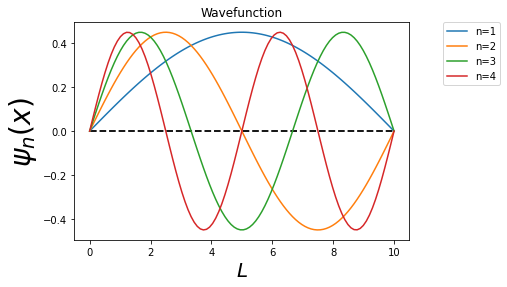

In [146]:
#Lets Plot Some Wavefunctions with a loop:   
#n = 1
#Lengh of Box in Angstroms
L=10
x = np.linspace(0,L,100)
#print(x)
# Adding a horizontal line at 0
plt.hlines(0.0, 0.0, L, linewidth=1.8, linestyle='--', color="black") 

for n in range(1,5):
  plt.plot(x,psi(x,n,L),label='n=%s'%n)


plt.legend(loc=2);
plt.xlabel(r'$L$',size=20)
plt.ylabel(r'$\psi_n(x)$',size=28)
plt.title('Wavefunction')
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.0)
plt.show()

**CLASS ACTIVITY**

Lets Make a Small Modificaiton to Our Loop to plot the Probability Densities 

#$|ψ(x)|^2 =  (\frac{2}{L})^\frac{1}{2} sin^2(\frac{nπx}{L}) $#


In [148]:
#Add Code Here

**Lab Exercise: Making Sense of Probabilistic Measurments of a Quantum System**

Imagine the following scenario.  You are working in a lab that is fabricating nanotubes with a confined electron that can effectively function asa  1D particles in a box.  You have a laser that can excite the confined electron to  different energy levels.  

Something has gone wrong with our equipment however, and we can't control the dimensions of nanotube (box length) or power of the laser that excites the electron.  We therefore are producing  producing nanotubes with an unknown diameter (box length) and the laser is exciting electrons to unknown energy level.  

The only thing that is working in our lab is our device to make measurements of the particle positions of resulting excited electron in a nanotube.  Each measurment produces a single particle position.  After we produce a nanotube we are able to make a certain # of measurments of our electron positions, and from this distribution, we want to figure out the size of the nanotube and the energy level of the electron.  

As our lab is fabricating nanotubes of confined electrons to sell on ETSY, we need to know their dimensions and the energy levels of the electron so we can price the accordingly.  Our measurments of particle positions are expensive however, so we want to figure out the smallest number of measurments we can make to be confident about the properties of our fabricated nanotubes

In [149]:
#Here is the code that simulates are apparutus for measuring particle positions

#We're going to make a distribution of particle position observations using magic statistics
#functions to draw random numbers from a definied probability distribution
import scipy.stats as st

def psi(x,n,L): 
  return np.sqrt(2.0/L)*np.sin(float(n)*np.pi*x/L)



def exp_measurement_generator(n_exp,L_exp):
 x = np.linspace(0, L, 100)
 class my_pdf(st.rv_continuous):
    def _pdf(self,x):
     return psi(x,n_exp,L_exp)**2  # Normalized over its range, in this case [0,1]
 POB_position_generator= my_pdf(a=0, b=L_exp, name='POB_distribution')
 return POB_position_generator

Lets test out our measurment apparuatus on a machine on a nanotube of known length (L=10 angstrom) and an electron of known energy (n=2)


20 Position Measurments


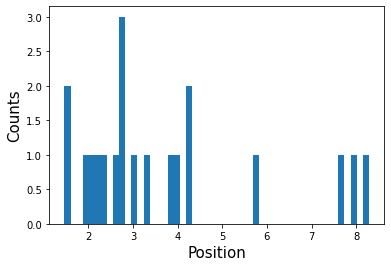

200 Position Measurments


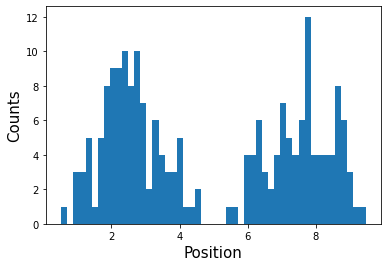

In [150]:
x = np.linspace(0, L, 100)
n_exp=2
L_exp=10
data_generator=exp_measurement_generator(n_exp,L_exp)
#Genearte Particle in a Box Position Measurements

#First Lets Plot or Distribution with 20 measurements
print("20 Position Measurments")
n_measurements=20
POB_positions=data_generator.rvs(size=n_measurements)
#Lets see what positions were generated
#print(POB_positions)

#now we'll plot a histogram of these positions
hist=plt.hist(POB_positions,bins=50)
plt.xlabel('Position',size=15)
plt.ylabel('Counts',size=15)
plt.show()

plt.clf()

#Now Lets Plot or Distribution with 200 measurements
n_measurements=200
print("200 Position Measurments")
POB_positions=data_generator.rvs(size=n_measurements)
#Lets see what positions were generated
#print(POB_positions)

#now we'll plot a histogram of these positions
hist=plt.hist(POB_positions,bins=50)
plt.xlabel('Position',size=15)
plt.ylabel('Counts',size=15)
plt.show()

Our a count number of measurments in a given interval, to be able to fit our POB function, we're going to converte the histogram into a normalized probability density where instead of counts and bin widths or x values are the histogram bin center and the y values are the fraction of the counts observed in that bin


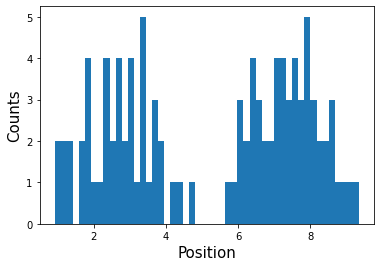

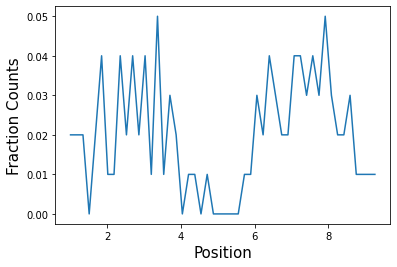

In [151]:
x = np.linspace(0, L, 100)
n_exp=2
L_exp=10
data_generator=exp_measurement_generator(n_exp,L_exp)

n_measurements=100
POB_positions=data_generator.rvs(size=n_measurements)
hist=plt.hist(POB_positions,bins=50)
plt.xlabel('Position',size=15)
plt.ylabel('Counts',size=15)
plt.show()
plt.clf()

counts=hist[0]
counts_norm=counts/np.sum(counts)
bin_edges=hist[1]
bin_centers = bin_edges[:-1] + np.diff(bin_edges)/2
plt.plot(bin_centers,counts_norm)
plt.xlabel('Position',size=15)
plt.ylabel('Fraction Counts',size=15)
plt.show()

Lets check the visual agreement between this data and different POB probability density predictions for POBs of different lengths and energy levels


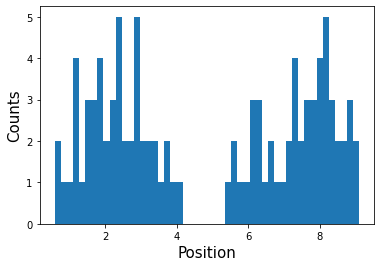

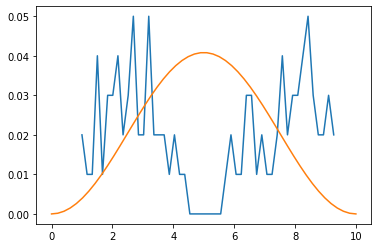

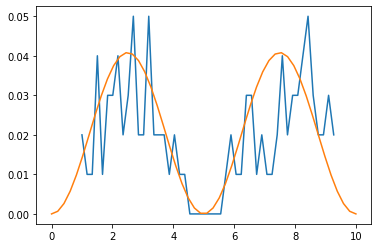

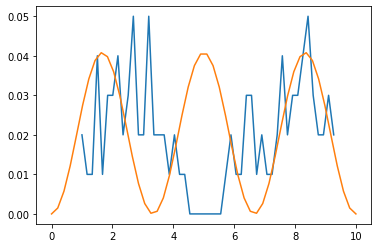

<Figure size 432x288 with 0 Axes>

In [152]:
#Lets check the visual agreement between this data and different POB probability density predictions
#based on this number of observations?
n_exp=2
L_exp=10
data_generator=exp_measurement_generator(n_exp,L_exp)
x = np.linspace(0, L, 50)

n_measurements=100
POB_positions=data_generator.rvs(size=n_measurements)
hist=plt.hist(POB_positions,bins=50)
plt.xlabel('Position',size=15)
plt.ylabel('Counts',size=15)
plt.show()
plt.clf()
counts=hist[0]
counts_norm=counts/np.sum(counts)


for n in range(1,4):
  plt.plot(bin_centers,counts_norm)
  psi_prob_norm=psi(x,n,L)**2/np.sum(psi(x,n,L)**2)
  plt.plot(x,psi_prob_norm,label='n=%s'%n)
  plt.legend
  plt.show()
  plt.clf()
  #psi_prob=(psi(x,n,L)**2)
  #plt.plot(x,psi_prob,label='n=%s'%n)


This Looks Pretty Easy To Discriminate Against.  Lets write a function to claculate the RMSD between our predicted probability distribution and what we measure

n: 1 RMSD: 0.024926452186133787


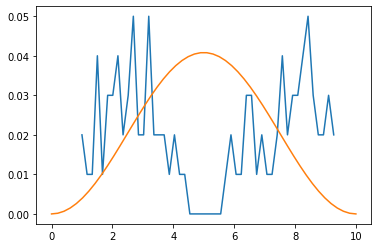

n: 2 RMSD: 0.01569922599430692


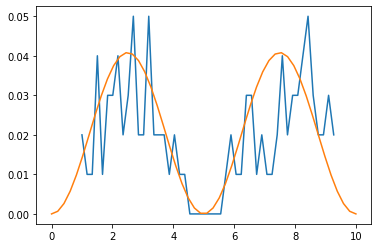

n: 3 RMSD: 0.01933550952608885


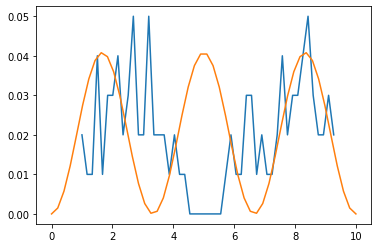

n: 4 RMSD: 0.017400051163512602


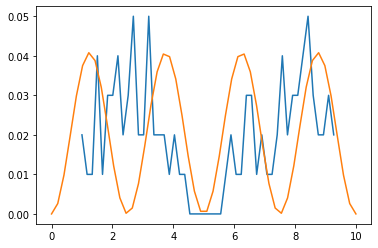

n: 5 RMSD: 0.019551540871632626


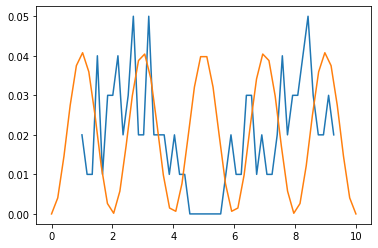

n: 6 RMSD: 0.019875658921066828


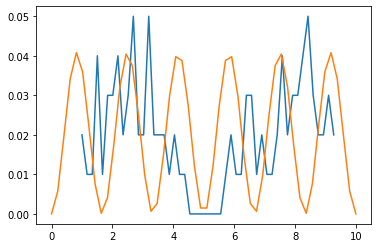

n: 7 RMSD: 0.01962570245868407


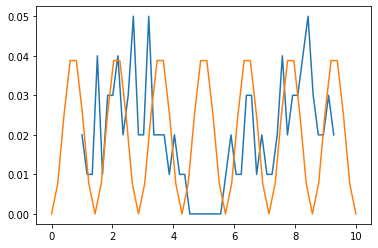

Text(0, 0.5, 'RMSD')

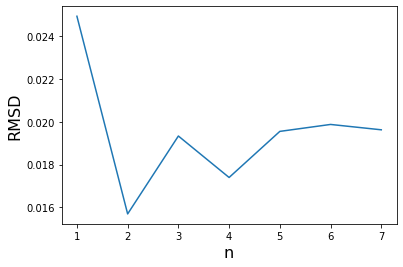

In [153]:
def calculate_RMSD(y_data,y_predicted):
  y_deviation=y_data-y_predicted
  N=len(y_data)
  y_deviation_squared=y_deviation**2
  RMSD=(np.sum(y_deviation_squared)/N)**0.5
  return RMSD 

x = np.linspace(0, L, 50)
rmsd=[]
n_val=[]
for n in range(1,8):
  plt.plot(bin_centers,counts_norm)
  psi_prob_norm=psi(x,n,L)**2/np.sum(psi(x,n,L)**2)
  RMSD=calculate_RMSD(psi_prob_norm,counts_norm)
  n_val.append(n)
  rmsd.append(RMSD)
  print("n:",n,"RMSD:",RMSD)
  plt.plot(x,psi_prob_norm,label='n=%s'%n)
  plt.legend
  plt.show()
  plt.clf()

plt.plot(n_val,rmsd)
plt.xlabel("n",size=16)
plt.ylabel("RMSD",size=16)

**Class Activity** 

It seems fairly clear that n=2.

Now Lets see if we can discriminate different possible values of L for this data set after setting n=2.


In [154]:
#Lets see if we can discriminate L for a given n


Now we're going to try to determine how many position measurments we need to make accurately calculate the values of L and n for new boxes of different sizes.  

Then we'll get some data from nanotubes of unkown dimensions and electron energy levels, and will attempt to determine their sizes and energy levles by scanning over different values of L and n.

**Class Activity**

If we have a known box size of L=10, how many measurments will we need to accurates calculate n for values of n=1,3,6,12,20

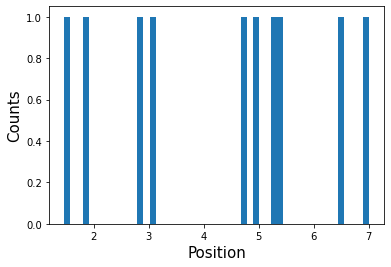

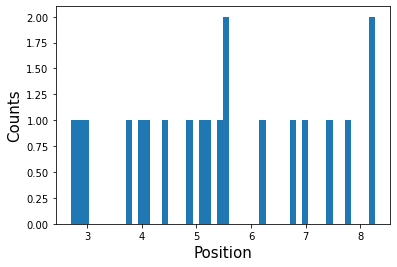

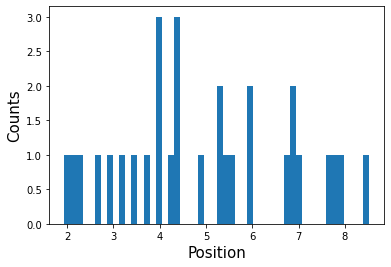

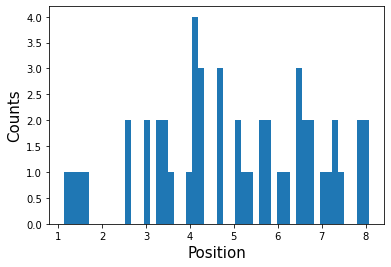

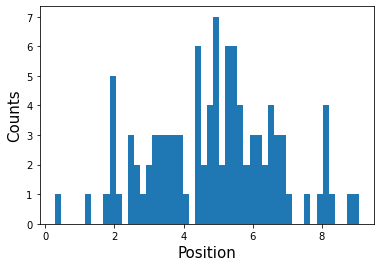

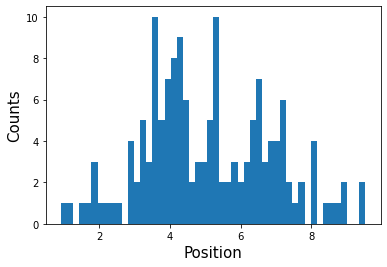

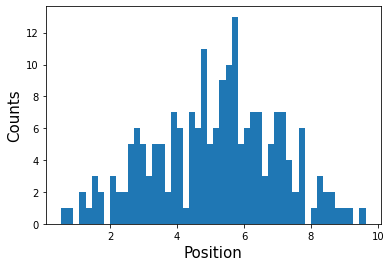

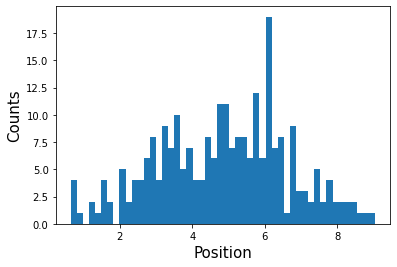

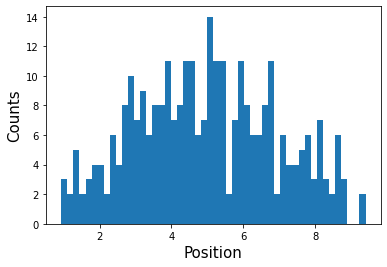

<Figure size 432x288 with 0 Axes>

In [155]:
#Set Box with a known size and energy level
n_exp=1
L_exp=10
data_generator=exp_measurement_generator(n_exp,L_exp)
x = np.linspace(0, L, 50)

n_mes=[10,20,30,50,100,150,200,250,300]
pob_position_counts=[]
for n in n_mes:
 POB_positions=data_generator.rvs(size=n)
 hist=plt.hist(POB_positions,bins=50)
 counts=hist[0]
 counts_norm=counts/np.sum(counts)
 pob_position_counts.append(counts_norm)
 plt.xlabel('Position',size=15)
 plt.ylabel('Counts',size=15)
 plt.show()
 plt.clf()
 
#counts=hist[0]
#counts_norm=counts/np.sum(counts)

For each of these sets of positions, iteratre through the tasks above and plot RMSD vs. proposed values of n


10


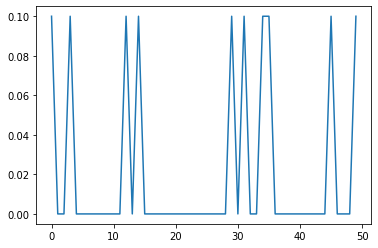

20


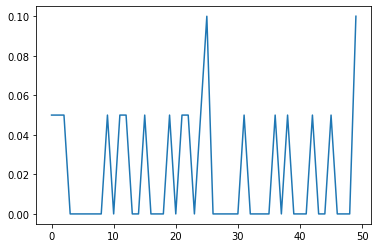

30


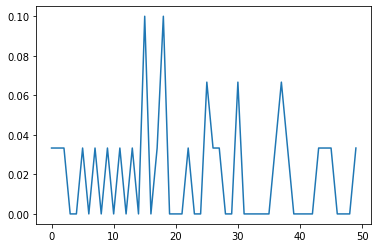

50


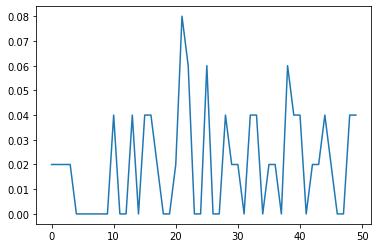

100


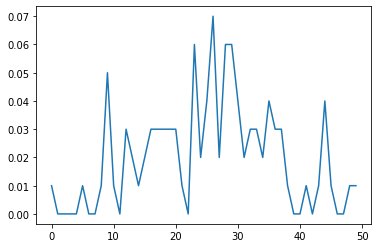

150


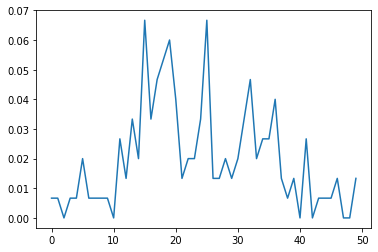

200


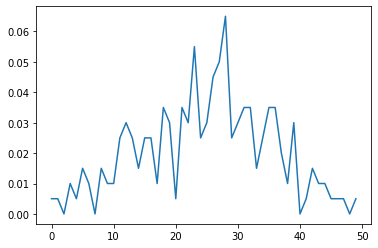

250


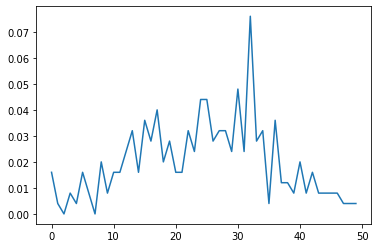

300


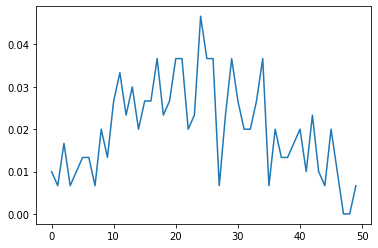

<Figure size 432x288 with 0 Axes>

In [156]:
#For each of these sets of positions, iteratre through the tasks above and plot RMSD vs. n_proposed

for i in range(0,len(n_mes)):
 print(n_mes[i])
 plt.plot(pob_position_counts[i])
 plt.show()
 plt.clf()
